In [107]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"
sns.set_style('ticks')
import warnings; warnings.simplefilter('ignore')

In [108]:
df = pd.read_csv('Smoker_Epigenetic_df.csv')
df.head(5)

,GSM,Smoking Status,Gender,Age,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,GSM1051525,current,f,67,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,GSM1051526,current,f,49,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,...,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,GSM1051527,current,f,53,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,GSM1051528,current,f,62,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,GSM1051529,never,f,33,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


In [109]:
df.isna().sum()

GSM                0
Smoking Status     0
Gender             0
Age                0
cg00050873        62
cg00212031        62
cg00213748        62
cg00214611        62
cg00455876        62
cg01707559        62
cg02004872        62
cg02011394        62
cg02050847        62
cg02233190        62
cg02494853        62
cg02839557        62
cg02842889        62
cg03052502        62
cg03155755        62
cg03244189        62
cg03443143        62
cg03683899        62
cg03695421        62
cg03706273        62
dtype: int64

In [110]:
df['Gender'].unique()

array([' f', ' m', ' M', ' F'], dtype=object)

In [111]:
df.dtypes

GSM                object
Smoking Status     object
Gender             object
Age                 int64
cg00050873        float64
cg00212031        float64
cg00213748        float64
cg00214611        float64
cg00455876        float64
cg01707559        float64
cg02004872        float64
cg02011394        float64
cg02050847        float64
cg02233190        float64
cg02494853        float64
cg02839557        float64
cg02842889        float64
cg03052502        float64
cg03155755        float64
cg03244189        float64
cg03443143        float64
cg03683899        float64
cg03695421        float64
cg03706273        float64
dtype: object

In [112]:
df['Gender'] = df['Gender'].str.lower()

In [113]:
df = df.drop(['GSM'],axis=1)

In [114]:
df.head(5)

,Smoking Status,Gender,Age,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,current,f,67,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,0.179144,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,current,f,49,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,0.155977,...,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,current,f,53,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,0.105745,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,current,f,62,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,0.111286,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,never,f,33,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,0.169108,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


<AxesSubplot:xlabel='Age', ylabel='Count'>

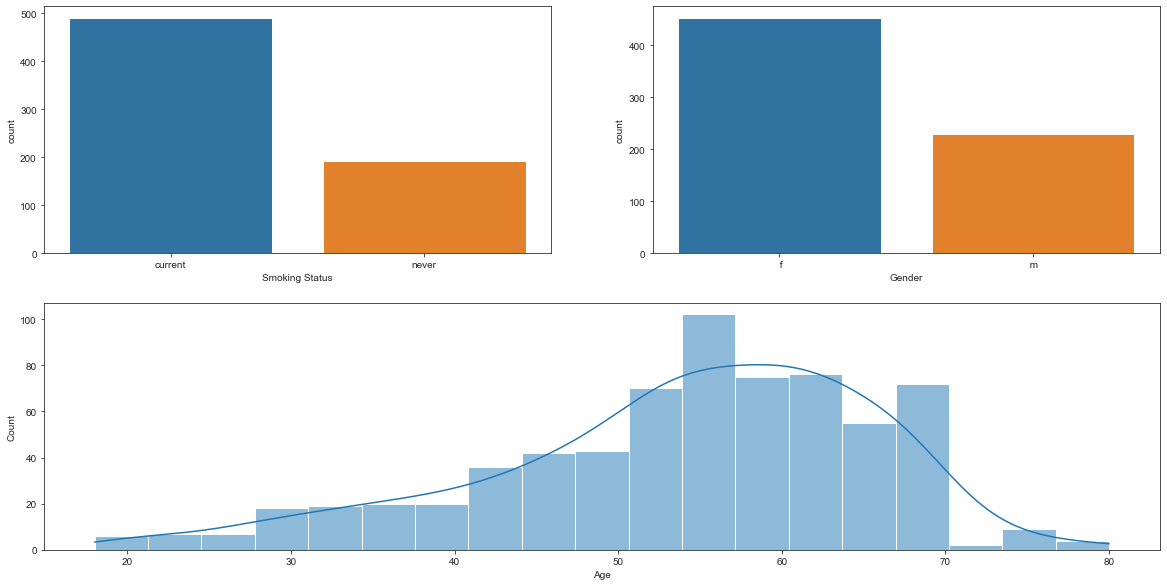

In [115]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
sns.countplot(x='Smoking Status', data=df, ax=ax1)
ax2 = fig.add_subplot(222)
sns.countplot(x='Gender',data=df,ax=ax2)
ax3 = fig.add_subplot(212)
sns.histplot(x='Age',data=df,kde=True,ax=ax3)

In [116]:
df=df.dropna(axis=0)

In [117]:
df.head(5)

,Smoking Status,Gender,Age,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,current,f,67,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,0.179144,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,current,f,49,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,0.155977,...,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,current,f,53,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,0.105745,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,current,f,62,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,0.111286,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,never,f,33,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,0.169108,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


In [118]:
df.isna().sum()

Smoking Status    0
Gender            0
Age               0
cg00050873        0
cg00212031        0
cg00213748        0
cg00214611        0
cg00455876        0
cg01707559        0
cg02004872        0
cg02011394        0
cg02050847        0
cg02233190        0
cg02494853        0
cg02839557        0
cg02842889        0
cg03052502        0
cg03155755        0
cg03244189        0
cg03443143        0
cg03683899        0
cg03695421        0
cg03706273        0
dtype: int64

In [119]:
s_data = df[list(df.columns[4:])+['Smoking Status']]    #a nice way to create a subdata frame useful for plotting.

In [120]:
s_data.head(5)

,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,cg02050847,cg02233190,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273,Smoking Status
0,0.422843,0.372455,0.621562,0.290777,0.267143,0.179144,0.480252,0.327608,0.241120,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983,current
1,0.568662,0.500600,0.498607,0.374591,0.190274,0.155977,0.418081,0.346463,0.175491,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533,current
2,0.360909,0.352732,0.373824,0.230674,0.314705,0.105745,0.615103,0.237539,0.246409,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248,current
3,0.304437,0.475235,0.486258,0.295181,0.295793,0.111286,0.301020,0.304535,0.177028,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516,current
4,0.131251,0.367545,0.761167,0.235770,0.250526,0.169108,0.392975,0.306226,0.301701,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857,never


In [121]:
len(s_data.columns)

20

In [122]:
s_data.iloc[:,0:19].head(5)

,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,cg02050847,cg02233190,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,0.422843,0.372455,0.621562,0.290777,0.267143,0.179144,0.480252,0.327608,0.241120,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,0.568662,0.500600,0.498607,0.374591,0.190274,0.155977,0.418081,0.346463,0.175491,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,0.360909,0.352732,0.373824,0.230674,0.314705,0.105745,0.615103,0.237539,0.246409,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,0.304437,0.475235,0.486258,0.295181,0.295793,0.111286,0.301020,0.304535,0.177028,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,0.131251,0.367545,0.761167,0.235770,0.250526,0.169108,0.392975,0.306226,0.301701,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


In [123]:
from joypy import joyplot

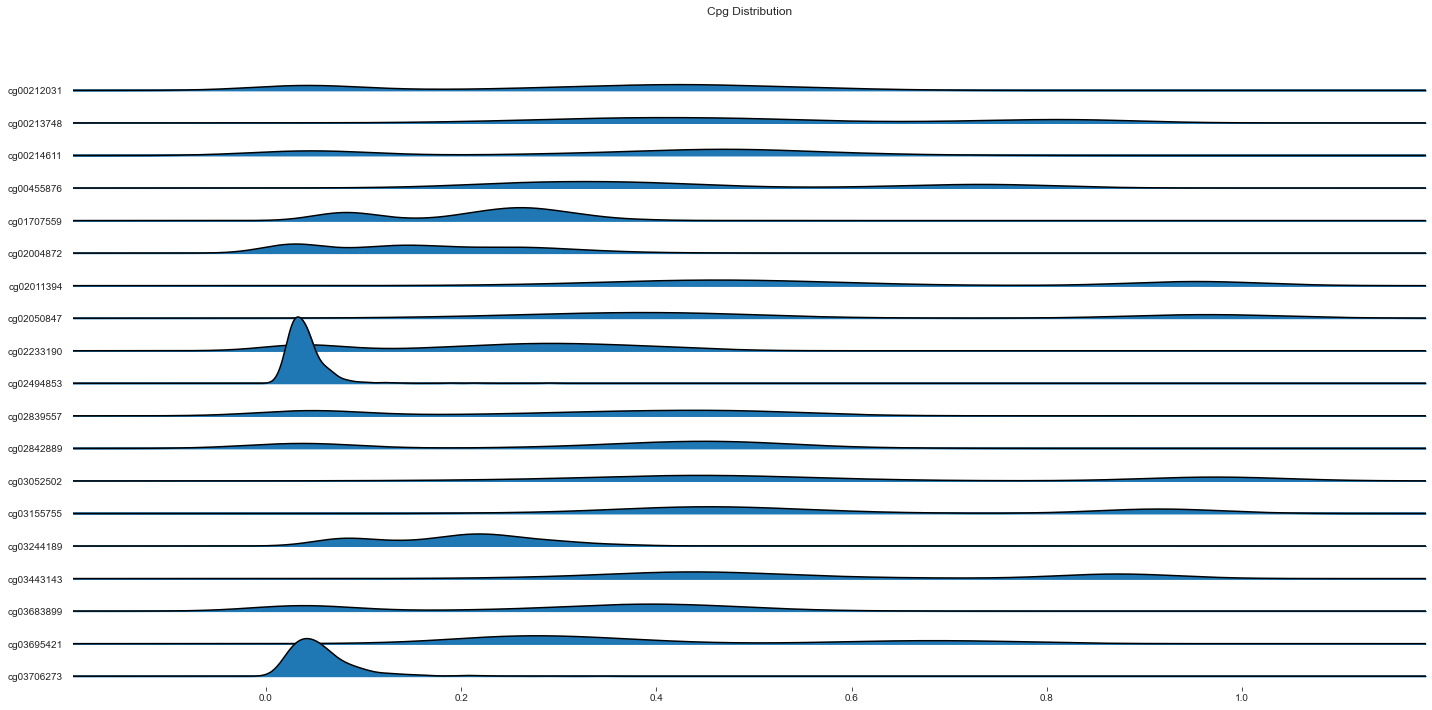

In [124]:
joyplot(data=df[list(df.columns[4:])],figsize=(20,10),title='Cpg Distribution')
plt.show()

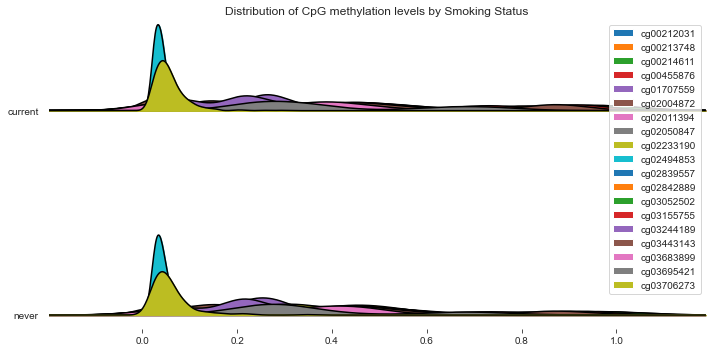

In [125]:
joyplot(data=s_data,figsize=(10,5),by='Smoking Status',legend=True,title='Distribution of CpG methylation levels by Smoking Status')
plt.show()

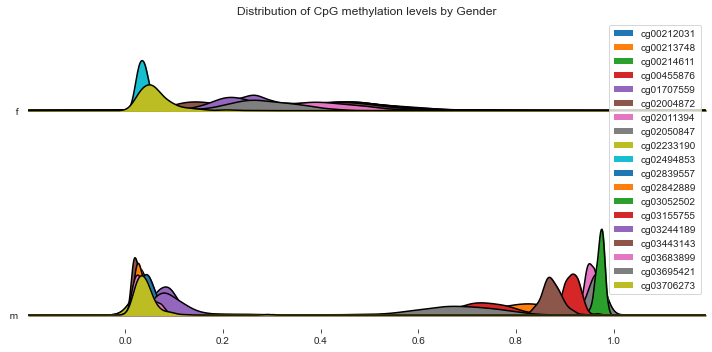

In [127]:
joyplot(data=df[list(df.columns[4:])+['Gender']],figsize=(10,5),by='Gender',legend=True,title='Distribution of CpG methylation levels by Gender')
plt.show()

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Smoking Status'] = le.fit_transform(df['Smoking Status'])

In [129]:
df.head(5)

,Smoking Status,Gender,Age,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,0,0,67,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,0.179144,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,0,0,49,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,0.155977,...,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,0,0,53,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,0.105745,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,0,0,62,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,0.111286,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,1,0,33,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,0.169108,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


<Figure size 1440x1080 with 0 Axes>

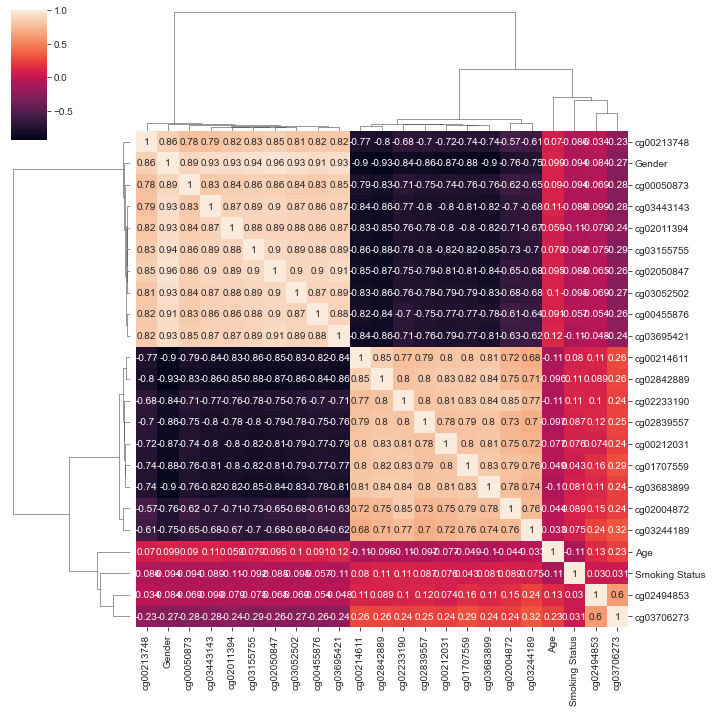

In [133]:
#correlation matrix
fig = plt.figure(figsize=(20,15))
sns.clustermap(df.corr(),annot=True)

In [134]:
##Try PCA analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [135]:
scaler = StandardScaler()
scaler.fit(df.iloc[:,4:])

StandardScaler()

In [136]:
pca = PCA()
pca_data = pca.fit_transform(scaler.transform(df.iloc[:,4:]))

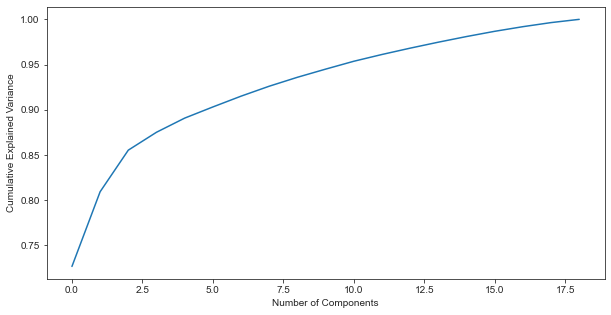

In [137]:
#Scree plot
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [138]:
percents = np.round(np.cumsum(pca.explained_variance_ratio_)*100,decimals=1)
labels = ['PC'+str(x) for x in range(1,len(percents)+1)]

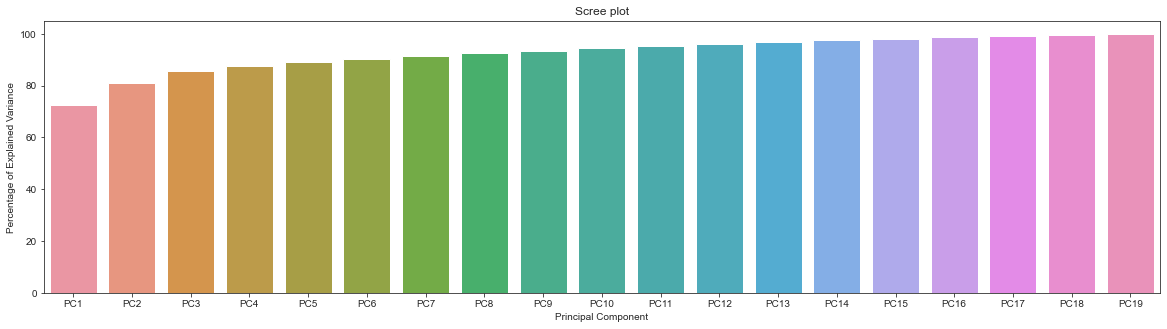

In [142]:
#Plotting the PCA components
plt.figure(figsize=(20,5))
sns.barplot(x=labels,y=percents)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree plot')
plt.show()

In [143]:
#2 components are fine to describe the data
pca_df = pd.DataFrame(pca_data,columns=labels)

In [144]:
pca_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-2.371098,1.782826,-1.488733,-0.401713,0.107507,0.480626,-0.395716,0.602415,0.830648,-0.263926,0.345651,0.091344,0.014763,-0.262196,0.364714,0.192916,0.077662,-0.067230,0.158728
1,-1.458340,0.583195,-1.294299,-0.495554,0.072796,0.068749,-1.208823,0.922963,0.233014,-0.354087,-0.318352,0.246754,-0.746596,0.134946,0.540841,0.478475,0.015684,-0.193823,0.257773
2,-1.616769,-0.785992,-0.967768,0.475150,0.582312,0.283913,0.304667,0.031362,-0.786158,0.056697,0.888402,-0.077908,-0.049954,-0.580409,0.355428,0.228177,-0.075472,0.376135,0.286537
3,-1.522641,-0.201218,-2.035529,-0.970204,0.405684,1.586715,-0.700902,0.022571,-0.110287,-0.439871,0.674909,-0.094439,-0.356663,-0.219538,0.636798,-0.629220,-0.000229,-0.265457,0.185218
4,-2.332201,-0.212121,-1.303371,-0.143795,-0.286464,0.720182,0.099725,-0.888743,1.263013,0.410708,0.503771,0.711551,-0.232982,-0.563669,-0.072583,-0.281490,0.032671,0.027045,0.102176


In [145]:
##adding the other columns
pca_df['Gender'] = df.Gender
pca_df['Age'] = df.Age 
pca_df['Smoking Status'] = df['Smoking Status']

In [146]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,Gender,Age,Smoking Status
0,-2.371098,1.782826,-1.488733,-0.401713,0.107507,0.480626,-0.395716,0.602415,0.830648,-0.263926,...,0.014763,-0.262196,0.364714,0.192916,0.077662,-0.067230,0.158728,0,67,0
1,-1.458340,0.583195,-1.294299,-0.495554,0.072796,0.068749,-1.208823,0.922963,0.233014,-0.354087,...,-0.746596,0.134946,0.540841,0.478475,0.015684,-0.193823,0.257773,0,49,0
2,-1.616769,-0.785992,-0.967768,0.475150,0.582312,0.283913,0.304667,0.031362,-0.786158,0.056697,...,-0.049954,-0.580409,0.355428,0.228177,-0.075472,0.376135,0.286537,0,53,0
3,-1.522641,-0.201218,-2.035529,-0.970204,0.405684,1.586715,-0.700902,0.022571,-0.110287,-0.439871,...,-0.356663,-0.219538,0.636798,-0.629220,-0.000229,-0.265457,0.185218,0,62,0
4,-2.332201,-0.212121,-1.303371,-0.143795,-0.286464,0.720182,0.099725,-0.888743,1.263013,0.410708,...,-0.232982,-0.563669,-0.072583,-0.281490,0.032671,0.027045,0.102176,0,33,1


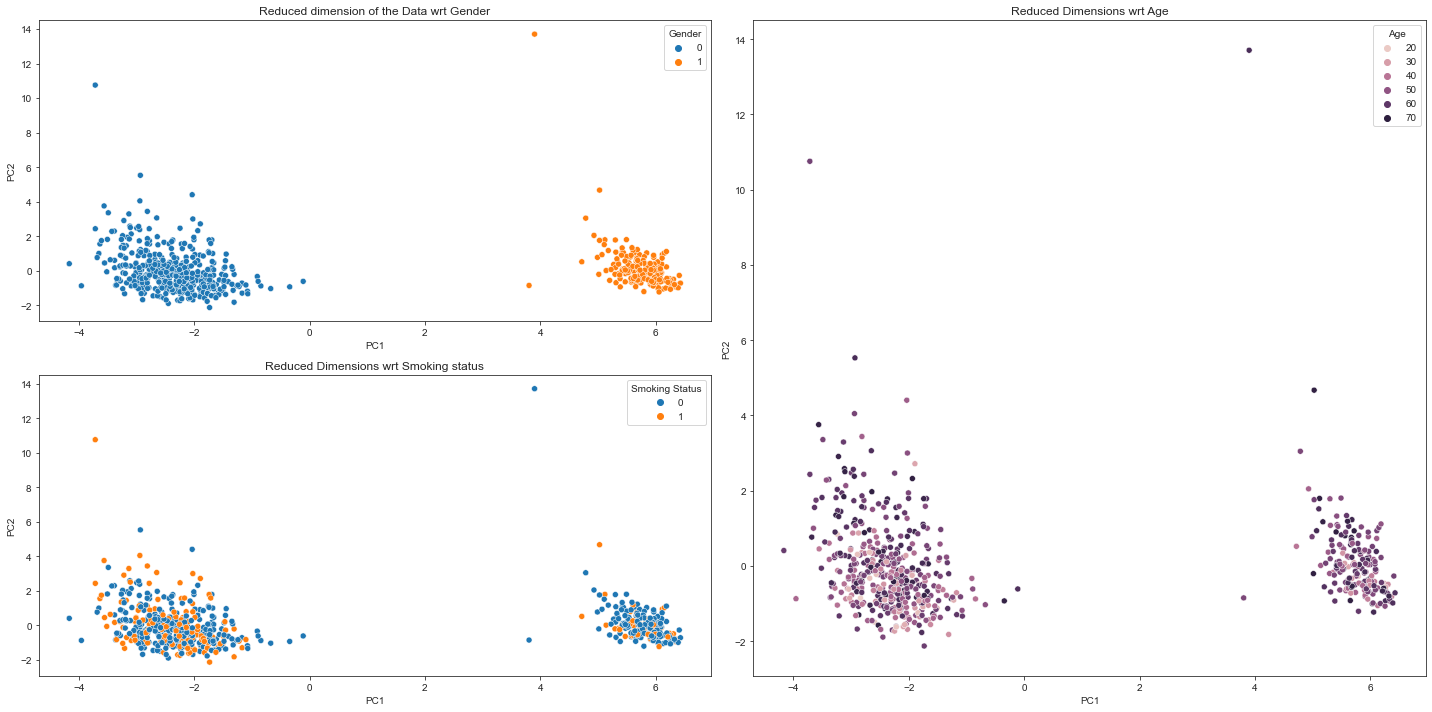

In [153]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.set_title('Reduced dimension of the Data wrt Gender')
sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],hue=pca_df['Gender'],data=pca_df)
ax2 = plt.subplot(223)
ax2.set_title('Reduced Dimensions wrt Smoking status')
sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],hue=pca_df['Smoking Status'],data=pca_df)
ax3 = plt.subplot(122)
ax3.set_title('Reduced Dimensions wrt Age')
sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],hue=pca_df['Age'],data=pca_df)
plt.tight_layout()
plt.show()

In [155]:
#Lets see the important features useful in predicting the smoking status
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [156]:
X = df.drop(['Smoking Status'],axis=1)
y = df['Smoking Status']

In [157]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [159]:
from xgboost import XGBClassifier

In [160]:
models_stats = pd.DataFrame(columns=['Model','Accuracy'])
models = {'XGB':XGBClassifier(),'RF':RandomForestClassifier()}

for test,clf in models.items():
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(test,':',accuracy_score(y_test,y_pred))
    models_stats.loc[test] = [accuracy_score(y_test,y_pred),confusion_matrix(y_test,y_pred).ravel()]

[16:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB : 0.64
RF : 0.656


In [163]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

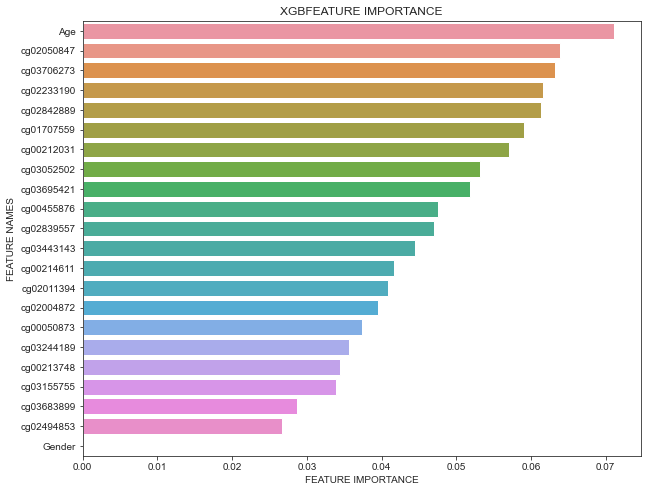

In [164]:
plot_feature_importance(models['XGB'].feature_importances_,X.columns,'XGB')

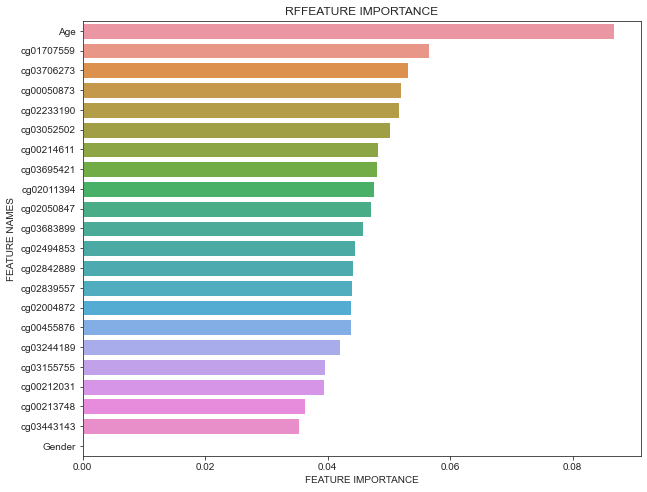

In [165]:
plot_feature_importance(models['RF'].feature_importances_,X.columns,'RF')